In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [4]:
train_df.head

<bound method NDFrame.head of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pi

In [5]:
test_df.head

<bound method NDFrame.head of       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         6     149     149     150     150     150     151     151     150   
1         5     126     128     131     132     133     134     135     135   
2        10      85      88      92      96     105     123     135     143   
3         0     203     205     207     206     207     209     210     209   
4         3     188     191     193     195     199     201     202     203   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
7167      1     135     119     108     102     105      99      61     103   
7168     12     157     159     161     164     166     166     171     174   
7169      2     190     191     190     191     190     190     192     192   
7170      4     201     205     208     209     214     216     218     223   
7171      2     173     174     173     174     173     173     175     175   

      pixel9  ...  pi

In [6]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
print(np.unique(y_train))
print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [13]:
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [16]:
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

# 2nd Conv Layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# 3rd Conv Layer
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Flatten
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer (24 classes)
model.add(Dense(25, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3)


In [17]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


Epoch 1/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.2510 - loss: 2.4257 - val_accuracy: 0.7631 - val_loss: 0.6715
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.8723 - loss: 0.3743 - val_accuracy: 0.8887 - val_loss: 0.3644
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9771 - loss: 0.0812 - val_accuracy: 0.9004 - val_loss: 0.3293
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.9902 - loss: 0.0353 - val_accuracy: 0.8996 - val_loss: 0.3737
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9929 - loss: 0.0264 - val_accuracy: 0.9148 - val_loss: 0.3308
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.9961 - loss: 0.0147 - val_accuracy: 0.9106 - val_loss: 0.3191
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9014 - val_loss: 0.4373
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.9987 - loss: 0.0055 - 

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9296 - loss: 0.4135

 Test Accuracy: 92.83%


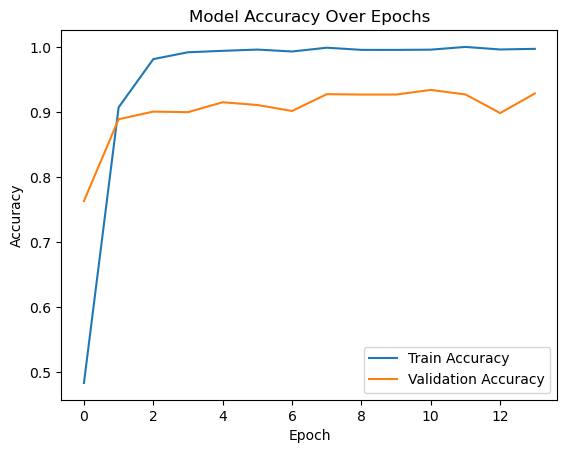

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.save("sign_language_model.keras")

In [24]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("sign_language_model.keras")
print("Model loaded successfully.")

Model loaded successfully.


In [26]:
# Evaluate loaded model on test data to confirm it's intact
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f" Test Accuracy from loaded model: {test_acc*100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9296 - loss: 0.4135
 Test Accuracy from loaded model: 92.83%
